# 13 a 17 Datos Sin Inconsistencias 

In [1]:
from IPython.display import display

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/con_inconsistencias/general/full.csv')
del df["Unnamed: 0"]

for element in ['fecha_reporte', 'fecha_evento', 'fecha_de_ultimo_avistamiento','fecha_de_ingreso',  'fecha_de_localizacion','fecha_probable_de_fallecimiento', 'fecha_de_nacimiento']:
    df[element] = pd.to_datetime(df[element],errors="coerce")

In [3]:
df = df[(df["edad"] > 12) & (df["edad"] < 18)].copy()

In [4]:
df['year_reporte'] = df['fecha_reporte'].dt.year
df['year_evento'] = df['fecha_evento'].dt.year
df["dias_de_busqueda_reporte"] = df["fecha_de_localizacion"] - df["fecha_reporte"]
df["dias_de_busqueda_evento"] = df["fecha_de_localizacion"] - df["fecha_evento"]
df['year_birthday'] = df['fecha_de_nacimiento'].dt.year
df["edad_calculada"] = df["year_reporte"] - df["year_birthday"]
df["dif_edad"] = df["edad_calculada"] - df["edad"]
df["tiempo_perdido"] = df["fecha_reporte"] - df["fecha_evento"]

In [5]:
df.T

,0,3,5,6,7,8,11,15,16,17,...,99081,99084,99085,99087,99106,99113,99119,99123,99124,99127
registro_nacional,desaparecido,desaparecido,desaparecido,desaparecido,desaparecido,desaparecido,desaparecido,desaparecido,desaparecido,desaparecido,...,desaparecido,desaparecido,desaparecido,desaparecido,desaparecido,desaparecido,desaparecido,desaparecido,desaparecido,desaparecido
fecha_reporte,2011-12-10 10:30:00,2012-02-01 11:41:00,2012-09-02 11:00:00,2012-10-02 11:20:00,2012-02-13 10:20:00,2012-02-21 02:00:00,2012-02-15 07:00:00,2012-10-02 11:30:00,2012-02-20 09:00:00,2012-03-24 11:45:00,...,2018-05-15 10:53:00,2018-10-04 12:00:00,2018-01-05 05:50:00,2018-04-25 12:00:00,2018-05-19 07:04:00,2018-05-25 02:00:00,2018-05-30 01:30:00,2018-05-15 08:48:00,2018-05-19 03:05:00,2018-04-25 03:00:00
fecha_evento,2009-09-02 02:30:00,2011-12-14 11:00:00,2012-06-02 12:00:00,2012-09-02 09:13:00,2012-11-02 11:00:00,2012-02-20 01:13:00,2012-02-14 04:30:00,2012-07-02 07:00:00,2012-02-20 01:13:00,2012-03-23 04:00:00,...,2018-05-14 02:30:00,2018-03-30 12:10:00,2018-04-27 08:30:00,2018-04-02 06:00:00,2018-05-17 01:40:00,2018-05-20 06:00:00,2018-05-20 11:00:00,2018-05-14 10:00:00,2018-05-18 01:40:00,2018-04-24 02:00:00
estado,tlaxcala,colima,colima,colima,colima,colima,colima,colima,colima,colima,...,puebla,nuevo_leon,aguascalientes,nuevo_leon,colima,puebla,puebla,aguascalientes,aguascalientes,guerrero
clave_estado,29,6,6,6,6,6,6,6,6,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
dias_de_busqueda_evento,NaT,22 days 01:00:00,94 days 13:25:00,-199 days +00:47:00,103 days 01:00:00,3 days 10:47:00,1 days 04:30:00,-138 days +05:00:00,3 days 10:47:00,1 days 08:00:00,...,2 days 01:30:00,-6664 days +23:50:00,-54 days +22:43:00,-6666 days +06:00:00,-6711 days +10:20:00,-6714 days +06:00:00,-6714 days +01:00:00,1 days 16:30:00,2 days 02:20:00,5 days 09:07:00
year_birthday,1995.0,1996.0,1997.0,1997.0,NaN,2000.0,2000.0,2000.0,2000.0,NaN,...,2004.0,2002.0,2003.0,2003.0,2003.0,2004.0,2000.0,2003.0,2003.0,2002.0
edad_calculada,16.0,16.0,15.0,15.0,NaN,12.0,12.0,12.0,12.0,NaN,...,14.0,16.0,15.0,15.0,15.0,14.0,18.0,15.0,15.0,16.0
dif_edad,3.0,1.0,1.0,1.0,NaN,-1.0,-4.0,-5.0,-2.0,NaN,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0


In [6]:
df.year_evento.describe()

count    28327.000000
mean      2013.340664
std          3.137748
min       1989.000000
25%       2012.000000
50%       2014.000000
75%       2015.000000
max       2018.000000
Name: year_evento, dtype: float64

In [7]:
df.year_reporte.describe()

count    28327.000000
mean      2013.604123
std          2.580927
min       2006.000000
25%       2012.000000
50%       2014.000000
75%       2015.000000
max       2018.000000
Name: year_reporte, dtype: float64

In [8]:
df.year_birthday.describe()

count    27539.000000
mean      1998.463924
std          9.244457
min       1753.000000
25%       1997.000000
50%       2000.000000
75%       2000.000000
max       2072.000000
Name: year_birthday, dtype: float64

In [9]:
df.edad_calculada.describe()

count    27539.000000
mean        15.225825
std          8.904813
min        -62.000000
25%         14.000000
50%         15.000000
75%         16.000000
max        256.000000
Name: edad_calculada, dtype: float64

In [10]:
df.dif_edad.describe()

count    27539.000000
mean         0.080214
std          8.860709
min        -78.000000
25%          0.000000
50%          0.000000
75%          1.000000
max        243.000000
Name: dif_edad, dtype: float64

In [11]:
df.dif_edad.value_counts()

 0.0     12139
 1.0      8987
-1.0      1224
-2.0      1122
-3.0       985
         ...  
-38.0        1
-60.0        1
-29.0        1
-20.0        1
 14.0        1
Name: dif_edad, Length: 70, dtype: int64

In [12]:
df[(df['dif_edad'] < -1)][['year_birthday','year_reporte','year_evento','edad','edad_calculada', 'dif_edad']].T

,11,15,16,22,28,37,42,43,54,64,...,96728,96875,97874,97913,97914,97926,97958,97998,98171,99069
year_birthday,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2009.0,2000.0,...,2002.0,2000.0,2017.0,2003.0,2012.0,2017.0,2000.0,2017.0,2017.0,2001.0
year_reporte,2012.0,2012.0,2012.0,2012.0,2012.0,2012.0,2012.0,2012.0,2009.0,2012.0,...,2016.0,2013.0,2017.0,2017.0,2017.0,2017.0,2012.0,2017.0,2017.0,2016.0
year_evento,2012.0,2012.0,2012.0,2012.0,2012.0,2012.0,2012.0,2012.0,2009.0,2012.0,...,2016.0,2013.0,2017.0,2017.0,2017.0,2017.0,2012.0,2017.0,2017.0,2016.0
edad,16.0,17.0,14.0,17.0,17.0,16.0,15.0,17.0,14.0,16.0,...,16.0,16.0,16.0,16.0,15.0,15.0,16.0,17.0,15.0,17.0
edad_calculada,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,0.0,12.0,...,14.0,13.0,0.0,14.0,5.0,0.0,12.0,0.0,0.0,15.0
dif_edad,-4.0,-5.0,-2.0,-5.0,-5.0,-4.0,-3.0,-5.0,-14.0,-4.0,...,-2.0,-3.0,-16.0,-2.0,-10.0,-15.0,-4.0,-17.0,-15.0,-2.0


In [13]:
df.drop(df[(df['dif_edad'] < -1)].index, inplace=True)

In [14]:
df.edad_calculada.describe()

count    23251.000000
mean        16.005892
std          9.299134
min         12.000000
25%         14.000000
50%         16.000000
75%         17.000000
max        256.000000
Name: edad_calculada, dtype: float64

In [15]:
df[(df['edad_calculada'] > 18)][['year_birthday','year_reporte','year_evento','edad','edad_calculada', 'tiempo_perdido']].T

,1005,1535,1789,1802,2095,2226,2229,2295,2331,2430,...,97336,97563,97720,97850,97971,97991,97992,97994,97996,98002
year_birthday,1987.0,1990.0,1990.0,1986.0,1991.0,1990.0,1990.0,1990.0,1982.0,1990.0,...,1990.0,1990.0,1988.0,1990.0,1990.0,1990.0,1990.0,1990.0,1990.0,1990.0
year_reporte,2009,2012,2012,2012,2010,2011,2011,2009,2008,2011,...,2017,2013,2011,2011,2009,2009,2009,2009,2013,2009
year_evento,2009,2012,2011,2011,2010,2011,2011,2009,2008,2011,...,2017,2011,2011,2011,2009,2009,2009,2009,2013,2009
edad,15.0,15.0,17.0,17.0,16.0,17.0,17.0,14.0,16.0,14.0,...,16.0,14.0,13.0,15.0,15.0,17.0,16.0,13.0,15.0,17.0
edad_calculada,22.0,22.0,22.0,26.0,19.0,21.0,21.0,19.0,26.0,21.0,...,27.0,23.0,23.0,21.0,19.0,19.0,19.0,19.0,23.0,19.0
tiempo_perdido,3 days 03:07:00,-57 days +04:55:00,214 days 23:21:00,282 days 13:32:00,122 days 07:49:00,-178 days +08:20:00,92 days 02:15:00,60 days 23:15:00,1 days 20:56:00,1 days 03:40:00,...,0 days 03:05:00,902 days 00:00:00,-1 days +16:05:00,2 days 01:49:00,-52 days +00:50:00,28 days 04:43:00,-53 days +02:53:00,0 days 21:53:00,4 days 00:00:00,-84 days +02:16:00


In [16]:
df.drop(df[(df['edad_calculada'] > 18)].index, inplace=True)

In [17]:
df.year_birthday.describe()

count    22880.000000
mean      1998.644799
std          2.695596
min       1988.000000
25%       1997.000000
50%       1999.000000
75%       2000.000000
max       2006.000000
Name: year_birthday, dtype: float64

In [18]:
df[(df['dif_edad'] > 1)][['year_birthday','year_reporte','year_evento','edad','edad_calculada', 'dif_edad','tiempo_perdido']].T

,0,21,991,1813,3600,4164,4165,4583,4603,4645,...,98676,98744,98892,98895,98909,98926,98933,98998,99050,99051
year_birthday,1995.0,1995.0,1993.0,1997.0,1993.0,1995.0,1994.0,1995.0,1991.0,1998.0,...,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0
year_reporte,2011,2011,2008,2012,2011,2012,2012,2013,2009,2013,...,2017,2017,2017,2017,2017,2017,2016,2018,2018,2018
year_evento,2009,2011,2008,2012,2009,2012,2011,2013,2009,2013,...,2010,2017,2017,2017,2017,2017,2016,2018,2018,2018
edad,13.0,14.0,13.0,13.0,16.0,15.0,16.0,16.0,15.0,13.0,...,13.0,15.0,14.0,13.0,13.0,13.0,14.0,14.0,14.0,15.0
edad_calculada,16.0,16.0,15.0,15.0,18.0,17.0,18.0,18.0,18.0,15.0,...,17.0,17.0,17.0,17.0,17.0,17.0,16.0,18.0,18.0,18.0
dif_edad,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,...,4.0,2.0,3.0,4.0,4.0,4.0,2.0,4.0,4.0,3.0
tiempo_perdido,829 days 08:00:00,163 days 00:44:00,32 days 01:15:00,6 days 20:58:00,776 days 19:30:00,-1 days +22:08:00,283 days 03:00:00,153 days 00:00:00,0 days 03:21:00,6 days 00:00:00,...,2488 days 02:30:00,0 days 00:00:00,-144 days +00:00:00,-29 days +07:04:03,-288 days +02:20:59,30 days 17:53:03,30 days 23:03:57,-1 days +19:34:00,30 days 00:39:39,0 days 08:30:00


In [19]:
df.year_evento.describe()

count    23668.000000
mean      2013.738254
std          3.048249
min       1998.000000
25%       2013.000000
50%       2014.000000
75%       2016.000000
max       2018.000000
Name: year_evento, dtype: float64

In [20]:
df[(df['year_evento'] == 1998)][['year_birthday','year_reporte','year_evento','edad','edad_calculada', 'dif_edad','tiempo_perdido','vivo_o_muerto']]

,year_birthday,year_reporte,year_evento,edad,edad_calculada,dif_edad,tiempo_perdido,vivo_o_muerto
97595,2002.0,2016,1998,15.0,14.0,-1.0,6657 days,aun_sin_localizar


In [21]:
df.edad_calculada.describe()

count    22880.000000
mean        15.458304
std          1.413599
min         12.000000
25%         14.000000
50%         16.000000
75%         17.000000
max         18.000000
Name: edad_calculada, dtype: float64

## Al final nos quedaron

In [22]:
len(df)

23668

## EDA

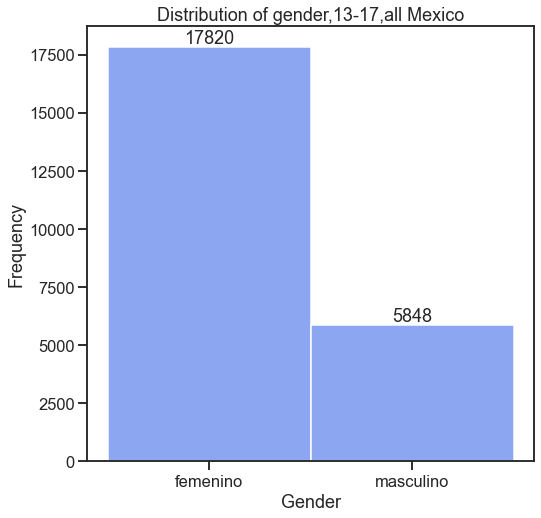

In [23]:
plt.figure(figsize=(8, 8))

sns.set_palette("coolwarm")
sns.set_style("ticks")
sns.set_context("talk")

plt.ylabel('Frequency')
plt.xlabel('Gender')
plt.title('Distribution of gender,13-17,all Mexico')

ax = sns.histplot(df.sexo)
ax.bar_label(ax.containers[0])

plt.show()

Text(0.5, 1.0, 'Presuntas Edades')

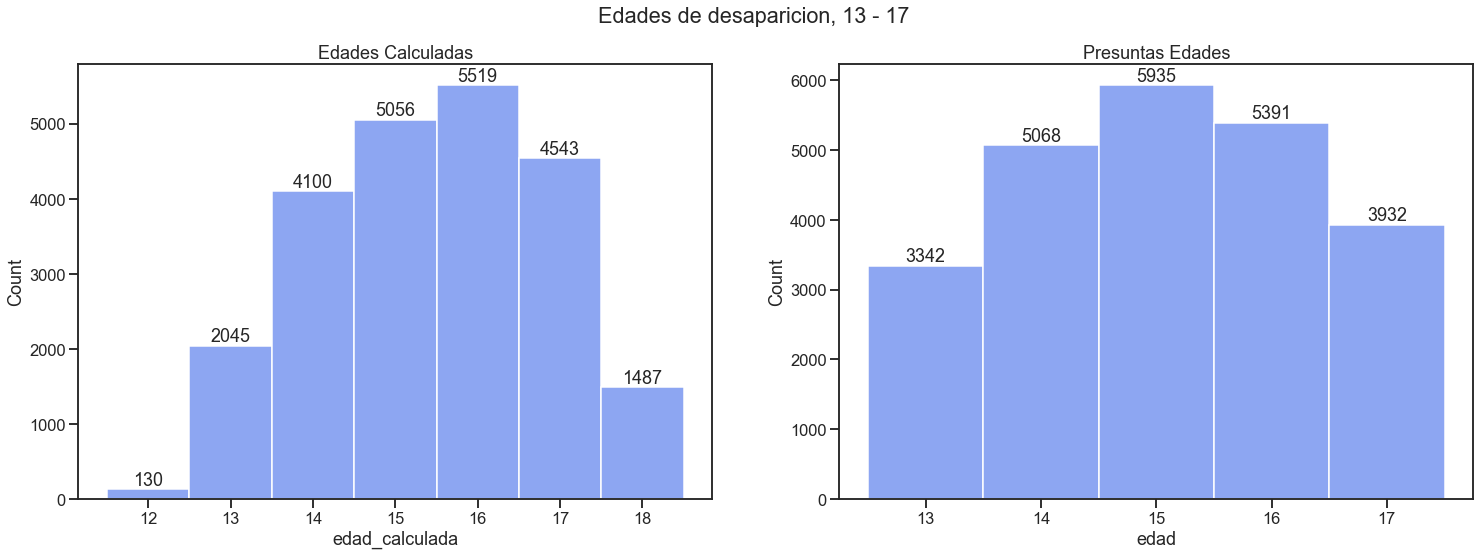

In [24]:
fig, axs = plt.subplots(1, 2,figsize=(25,8))

fig.suptitle('Edades de desaparicion, 13 - 17')

plotUno = sns.histplot(df.edad_calculada,discrete='True',ax=axs[0])
plotUno.bar_label(plotUno.containers[0])
axs[0].set_title('Edades Calculadas')

plotDos = sns.histplot(df.edad,discrete='True',ax=axs[1])
plotDos.bar_label(plotDos.containers[0])
axs[1].set_title('Edades en registros')

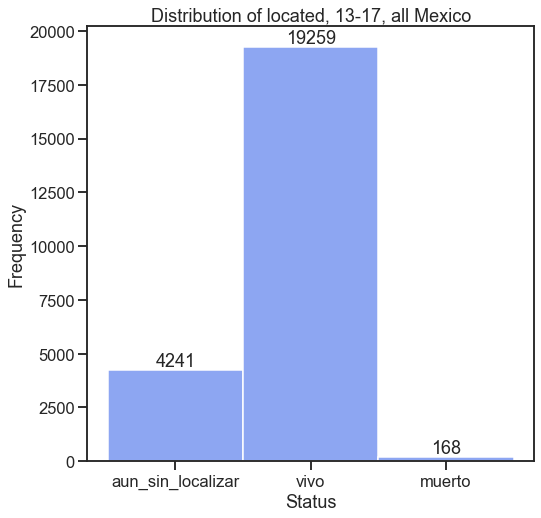

In [25]:
plt.figure(figsize=(8, 8))

sns.set_style("ticks")
sns.set_context("talk")

plt.ylabel('Frequency')
plt.xlabel('Status')
plt.title('Distribution of located, 13-17, all Mexico')

ax = sns.histplot(df.vivo_o_muerto)
ax.bar_label(ax.containers[0])

plt.show()

In [26]:
df[(df["sexo"]=="femenino")].vivo_o_muerto.value_counts()

vivo                 15025
aun_sin_localizar     2740
muerto                  55
Name: vivo_o_muerto, dtype: int64

In [27]:
df[(df["sexo"]=="masculino")].vivo_o_muerto.value_counts()

vivo                 4234
aun_sin_localizar    1501
muerto                113
Name: vivo_o_muerto, dtype: int64

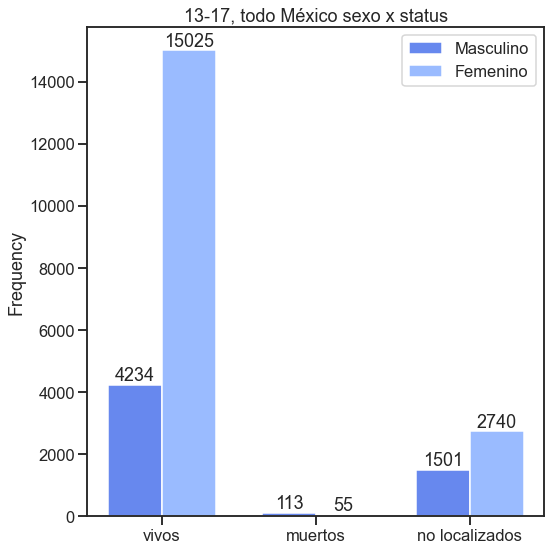

In [28]:
labels = ['vivos', 'muertos', 'no localizados']
men_means = [4234,113,1501]
women_means = [15025, 55, 2740]


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots(figsize=(8,8))
rects1 = ax.bar(x - width/2, men_means, width, label='Masculino')
rects2 = ax.bar(x + width/2, women_means, width, label='Femenino')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Frequency')
ax.set_title('13-17, todo México sexo x status')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 0), #(offset x, offset y)
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

In [29]:
df.posible_causa_desaparicion.value_counts().head(15)

no_especificado                     2635
-1                                  1247
otros_causas                        1031
se_fue_con_su_novio                  994
problemas_en_su_casa                 874
rebeldia                             484
se_fue_de_fiesta_con_amigos          473
problemas_familiares                 467
se_fue_con_el_novio                  244
se_desconoce                         178
por_su_propia_voluntad               172
problemas_de_conducta                154
ausencia_voluntaria_por_noviazgo     111
por_problemas_familiares              98
sin_dato                              93
Name: posible_causa_desaparicion, dtype: int64

In [30]:
df.condicion_encontrado.value_counts()

no_especificado                            10144
buen_estado_de_salud                        8817
sin_dato                                     213
golpes                                        61
descomposición                                25
tiro_de_gracia                                20
violación                                     17
postura_corporal_incómoda                      7
maniatado                                      5
ahogamiento                                    5
asfixia                                        5
quemaduras                                     4
decapitado                                     4
mutilado                                       3
quemado_(no_es_lo_mismo_que_quemaduras)        3
apuñalamiento                                  3
baño_con_sustancia_química_caústica            3
atado_de_pies_y_manos                          2
ahorcamiento                                   2
ingesta_de_producto_químico                    2
arrastrado_con_vehíc

## Exploracion por condicion = golpes

In [31]:
df[(df["condicion_encontrado"] == "golpes")][['edad', 'sexo']].value_counts()

edad  sexo     
16.0  masculino    9
17.0  masculino    9
15.0  masculino    8
      femenino     7
16.0  femenino     7
17.0  femenino     7
13.0  femenino     4
14.0  femenino     4
13.0  masculino    3
14.0  masculino    3
dtype: int64

In [32]:
df[(df["condicion_encontrado"] == "golpes")].posible_causa_desaparicion.value_counts()

privacion_ilegal_de_la_libertad                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   3
no_especificado                                                                                                                                                                                                                                                                     

In [33]:
df[(df["condicion_encontrado"] == "golpes")].estado.value_counts()

nuevo_leon         23
sinaloa            16
tamaulipas          8
guerrero            5
chihuahua           2
quintana_roo        1
veracruz            1
baja_california     1
nayarit             1
sonora              1
durango             1
tabasco             1
Name: estado, dtype: int64

## Exploracion por condicion = descomposicion

In [34]:
df[(df["condicion_encontrado"] == "descomposición")][['edad', 'sexo']].value_counts()

edad  sexo     
17.0  masculino    7
16.0  femenino     5
      masculino    5
14.0  femenino     2
15.0  masculino    2
17.0  femenino     2
14.0  masculino    1
15.0  femenino     1
dtype: int64

In [35]:
df[(df["condicion_encontrado"] == "descomposición")].posible_causa_desaparicion.value_counts()

-1                                                                                                                                                                                                          3
no_especificado                                                                                                                                                                                             2
fue_localizada_occisa_en_fosa_clandestina                                                                                                                                                                   1
informa_la_madre_de_la_desaparecida_que_salio_a_la_iglesia_del_poblado_y_no_regreso_y_se_encontraron_los_restos_humanos_tipo_osamenta?,_?que_fueron_localizados_entre_los_surcos_de_?una_parcela_ejidal?    1
muerte                                                                                                                                                                          

In [36]:
df[(df["condicion_encontrado"] == "descomposición")].estado.value_counts()

guerrero           8
sinaloa            5
chiapas            3
colima             2
zacatecas          2
durango            1
nuevo_leon         1
no_especificado    1
sonora             1
guanajuato         1
Name: estado, dtype: int64

## Exploracion por condicion = violacion

In [37]:
df[(df["condicion_encontrado"] == "violación")][['edad', 'sexo']].value_counts()

edad  sexo    
15.0  femenino    7
17.0  femenino    4
14.0  femenino    3
13.0  femenino    2
16.0  femenino    1
dtype: int64

In [38]:
df[(df["condicion_encontrado"] == "violación")].estado.value_counts()

sinaloa         3
tamaulipas      2
quintana_roo    2
durango         2
jalisco         2
sonora          2
colima          1
guerrero        1
morelos         1
chihuahua       1
Name: estado, dtype: int64

## Tiempos

In [39]:
df.tiempo_perdido.value_counts().head(20)

0 days      1155
1 days      1001
2 days       512
31 days      330
3 days       306
30 days      234
61 days      220
4 days       170
5 days       106
92 days      100
6 days        79
7 days        57
59 days       48
28 days       47
8 days        42
91 days       39
122 days      39
62 days       39
90 days       37
9 days        36
Name: tiempo_perdido, dtype: int64

In [40]:
df.dias_de_busqueda_reporte.value_counts().head(15)

0 days 00:00:00     599
1 days 00:00:00     235
2 days 00:00:00     138
3 days 00:00:00     100
4 days 00:00:00      72
61 days 00:00:00     63
31 days 00:00:00     60
30 days 00:00:00     60
0 days 04:00:00      56
0 days 03:00:00      54
0 days 02:00:00      53
20 days 00:00:00     47
6 days 00:00:00      43
5 days 00:00:00      43
0 days 05:00:00      41
Name: dias_de_busqueda_reporte, dtype: int64

In [41]:
df.dias_de_busqueda_evento.value_counts().head(15)

0 days 00:00:00     251
1 days 00:00:00     230
2 days 00:00:00     180
3 days 00:00:00     145
4 days 00:00:00     107
31 days 00:00:00    100
5 days 00:00:00      82
61 days 00:00:00     73
6 days 00:00:00      63
30 days 00:00:00     59
1 days 03:00:00      56
1 days 01:00:00      48
7 days 00:00:00      46
2 days 03:00:00      45
8 days 00:00:00      43
Name: dias_de_busqueda_evento, dtype: int64

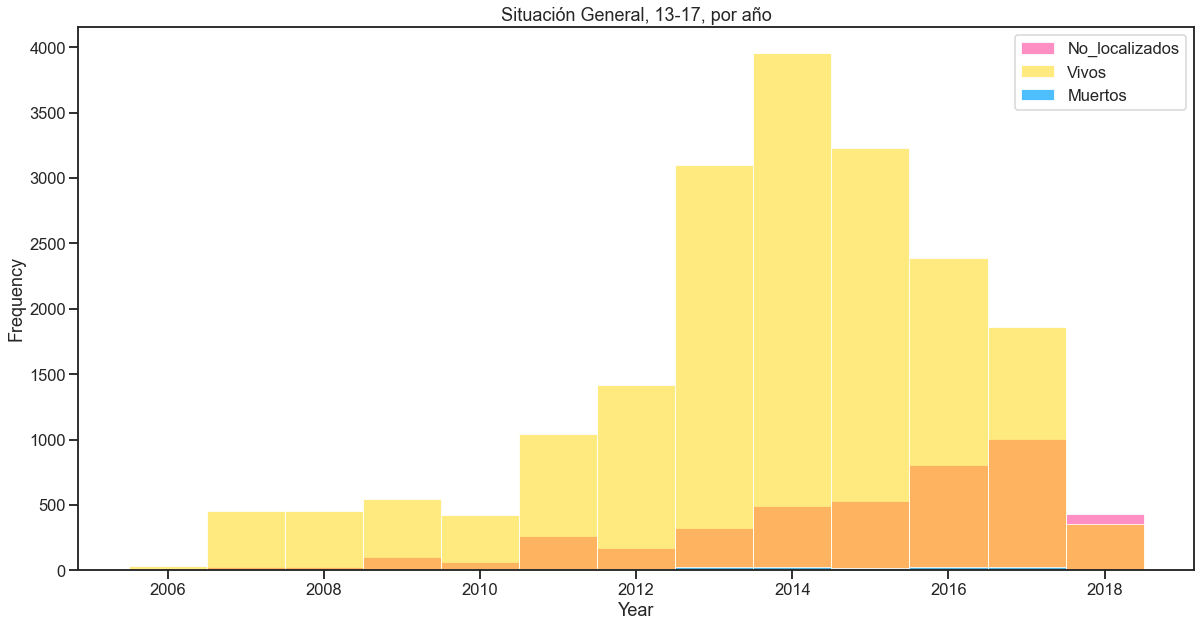

In [42]:
plt.figure(figsize=(20,10))

sns.set_style("ticks")
sns.set_context("talk")

sns.histplot(df[(df["vivo_o_muerto"] == "aun_sin_localizar" )].year_reporte, label='No_localizados', alpha=0.5,linewidth=.8,discrete="true",color="#fe218b")
sns.histplot(df[(df["vivo_o_muerto"] == "vivo" )].year_reporte,label='Vivos', alpha=0.5,linewidth=.8,discrete="true",color="#fed700")
sns.histplot(df[(df["vivo_o_muerto"] == "muerto" )].year_reporte, label='Muertos', alpha=0.8,linewidth=.8,discrete="true", color="#21b0fe")

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Year')
plt.title('Situación General, 13-17, por año')

plt.show()

## Data to export to Tableau

In [43]:
df.estado.value_counts()

guanajuato             4796
mexico                 3566
chihuahua              1470
puebla                 1443
sinaloa                1277
baja_california        1214
aguascalientes         1192
colima                  807
tamaulipas              797
nuevo_leon              702
quintana_roo            662
ciudad_de_mexico        588
queretaro               582
sonora                  575
chiapas                 554
guerrero                446
jalisco                 373
campeche                369
michoacan               341
hidalgo                 328
durango                 311
veracruz                286
yucatan                 234
morelos                 225
tabasco                 182
oaxaca                  106
coahuila                 71
zacatecas                70
tlaxcala                 37
no_especificado          27
nayarit                  19
san_luis_potosi          15
baja_california_sur       3
Name: estado, dtype: int64

In [44]:
import scipy.stats as stats
stats.zscore(df.estado.value_counts())

guanajuato             4.136215
mexico                 2.888898
chihuahua              0.763387
puebla                 0.736007
sinaloa                0.567669
baja_california        0.503782
aguascalientes         0.481473
colima                 0.091052
tamaulipas             0.080911
nuevo_leon            -0.015426
quintana_roo          -0.055989
ciudad_de_mexico      -0.131031
queretaro             -0.137116
sonora                -0.144214
chiapas               -0.165510
guerrero              -0.275031
jalisco               -0.349058
campeche              -0.353115
michoacan             -0.381509
hidalgo               -0.394692
durango               -0.411931
veracruz              -0.437283
yucatan               -0.490016
morelos               -0.499142
tabasco               -0.542748
oaxaca                -0.619818
coahuila              -0.655311
zacatecas             -0.656325
tlaxcala              -0.689789
no_especificado       -0.699930
nayarit               -0.708043
san_luis

In [45]:
df.rename(columns = {'estado_(localizado)':'estado_localizado'}, inplace = True)
df['estado_localizado']= df['estado_localizado'].replace('estado_de_mexico','mexico')
df.to_csv('13-17_usable.csv', index=False)

# BUSQUEDA SOFIA

In [46]:
df = pd.read_csv('13-17_usable.csv')

In [47]:
df = df[(df["sexo"]=="femenino") ]
df = df[(df["estado"]=="ciudad_de_mexico") ]
df = df[(df["edad"]==16) ]
df.head()

,registro_nacional,fecha_reporte,fecha_evento,estado,clave_estado,municipio,clave_municipio,nacionalidad,estatus_migratorio,sexo,...,clasificacion_causal,causal,year_reporte,year_evento,dias_de_busqueda_reporte,dias_de_busqueda_evento,year_birthday,edad_calculada,dif_edad,tiempo_perdido
492,desaparecido,2011-09-01 12:00:00,2011-08-01 12:00:00,ciudad_de_mexico,9,azcapotzalco,2,mexicana,no_especificado,femenino,...,_,_,2011,2011,NaN,NaN,NaN,NaN,NaN,31 days 00:00:00
502,desaparecido,2011-06-12 12:00:00,2011-02-12 12:00:00,ciudad_de_mexico,9,iztacalco,6,mexicana,no_especificado,femenino,...,_,_,2011,2011,NaN,NaN,NaN,NaN,NaN,120 days 00:00:00
628,desaparecido,2012-09-22 04:06:00,2012-09-21 12:00:00,ciudad_de_mexico,9,tlalpan,12,mexicana,no_especificado,femenino,...,_,_,2012,2012,2 days 07:54:00,3 days 00:00:00,NaN,NaN,NaN,0 days 16:06:00
673,desaparecido,2011-04-04 12:00:00,2011-01-17 12:00:00,ciudad_de_mexico,9,no_especificado,0,mexicana,no_especificado,femenino,...,_,_,2011,2011,NaN,NaN,NaN,NaN,NaN,77 days 00:00:00
700,desaparecido,2011-07-23 12:00:00,2011-07-19 12:00:00,ciudad_de_mexico,9,alvaro_obregon,10,mexicana,no_especificado,femenino,...,_,_,2011,2011,NaN,NaN,NaN,NaN,NaN,4 days 00:00:00


In [48]:
df.dias_de_busqueda_evento.value_counts().head(10)

-4012 days +00:00:00    2
69 days 00:00:00        2
3 days 00:00:00         1
-44 days +00:00:00      1
11 days 00:00:00        1
-4007 days +00:00:00    1
32 days 00:00:00        1
6 days 00:00:00         1
-18 days +00:00:00      1
29 days 00:00:00        1
Name: dias_de_busqueda_evento, dtype: int64

In [49]:
df.dias_de_busqueda_reporte.value_counts().head(10)

114 days 00:00:00       2
0 days 00:00:00         2
2 days 07:54:00         1
-68 days +00:00:00      1
-4010 days +00:00:00    1
27 days 00:00:00        1
5 days 00:00:00         1
64 days 00:00:00        1
28 days 00:00:00        1
147 days 00:00:00       1
Name: dias_de_busqueda_reporte, dtype: int64

In [50]:
df.to_csv('busqueda.csv', index=False)

In [51]:
df.posible_causa_desaparicion.value_counts()

no_especificado     50
noviazgo             2
no_especiifcado      1
no_especifica        1
sin_especificar      1
no_esppecificado     1
no_especifcado       1
Name: posible_causa_desaparicion, dtype: int64

In [52]:
df.estado_localizado.value_counts()

no_especificado     70
distrito_federal    15
mexico               2
Name: estado_localizado, dtype: int64

In [53]:
df.year_reporte.head()

492    2011
502    2011
628    2012
673    2011
700    2011
Name: year_reporte, dtype: int64

In [54]:
df = df[(df['year_reporte'] > 2016)]